In [483]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Combine the data into a single dataset and remove drugs outside of scope
mouse_df = pd.read_csv("data/mouse_drug_data.csv")
trial_df = pd.read_csv("data/clinicaltrial_data.csv")
drugs_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"] 
merged_df = trial_df.merge(mouse_df)
comb_df = merged_df[merged_df["Drug"].isin(drugs_list)]

In [484]:
#dataframe to calc average tumor size by drug|timepoint and pivot
avgsize_df = comb_df.groupby(["Drug","Timepoint"], as_index=False)["Tumor Volume (mm3)"].mean().pivot(index="Timepoint", columns= "Drug", values="Tumor Volume (mm3)")

In [485]:
#avg size error for error bars
avgerror_size= comb_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

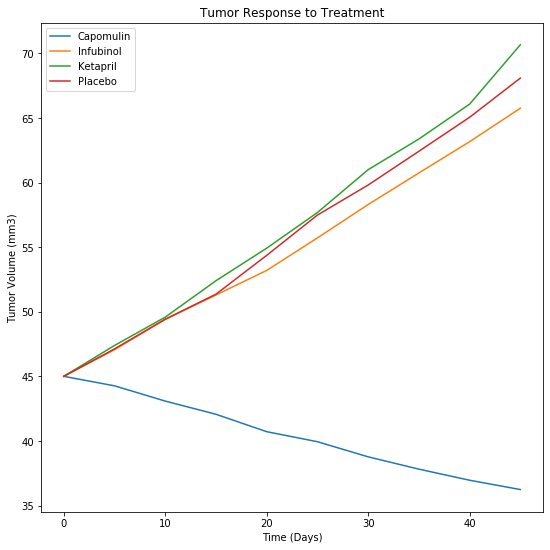

In [498]:
#create size chart
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(avgsize_df)
plt.legend(avgsize_df, loc=2)
plt.rcParams["figure.figsize"] = (9,9)
plt.show()

## Metastatic Response to Treatment

In [487]:
#dataframe to calc average metastasis by drug|timepoint and pivot
avgmeta_df = comb_df.groupby(["Drug","Timepoint"], as_index=False)["Metastatic Sites"].mean().pivot(index="Timepoint", columns= "Drug", values="Metastatic Sites")

In [488]:
#avg metastatic error for error bars
avgerror_meta = comb_df.drop("Mouse ID", axis=1).groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

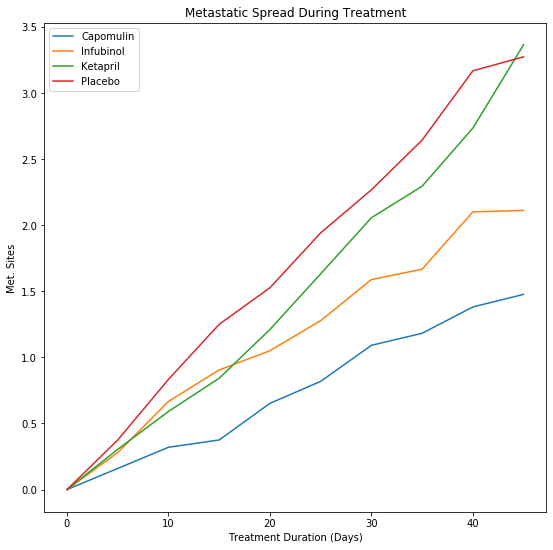

In [489]:
#create metastisis chart
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.plot(avgmeta_df)
plt.legend(avgmeta_df, loc=2)
plt.rcParams["figure.figsize"] = (9,9)
plt.show()

## Survival Rates

In [490]:
#dataframe to count surviving mice by drug|timepoint and pivot
mice_df = comb_df.groupby(["Drug","Timepoint"], as_index=False)["Mouse ID"].count().pivot(index="Timepoint", columns= "Drug", values="Mouse ID")

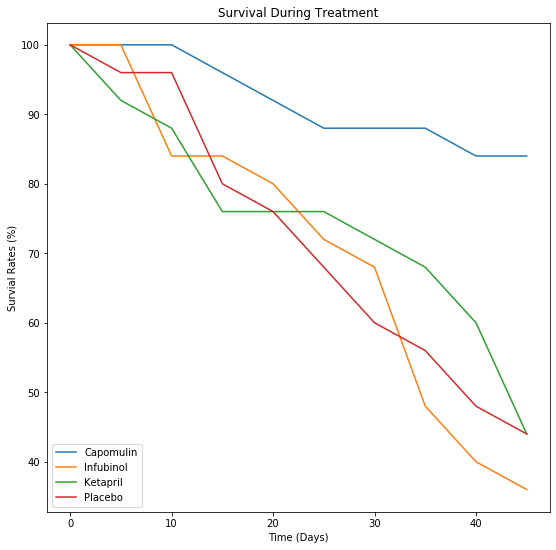

In [491]:
#create survival chart
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survial Rates (%)")
plt.plot(mice_df/25*100)
plt.legend(mice_df, loc=3)
plt.rcParams["figure.figsize"] = (9,9)
plt.show()

## Summary Bar Graph

In [492]:
# Calculate the percent changes for each drug

# Display the data to confirm
result_df = avgsize_df[avgsize_df.index.isin(["0","45"])]
result_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
45,36.236114,65.755562,70.662958,68.084082


In [493]:
volchange = (result_df.iloc[1] - result_df.iloc[0]) / result_df.iloc[0]

In [494]:
volchange

Drug
Capomulin   -0.194753
Infubinol    0.461235
Ketapril     0.570288
Placebo      0.512980
dtype: float64

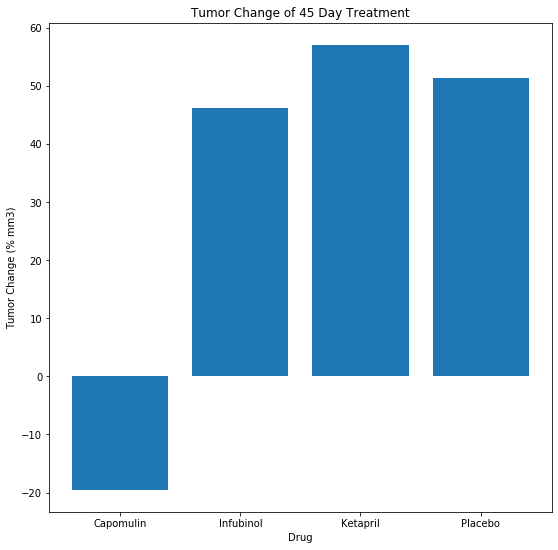

In [497]:
#create bar chart
plt.title("Tumor Change of 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("Tumor Change (% mm3)")
plt.bar(drugs_list, volchange*100)
plt.rcParams["figure.figsize"] = (9,9)
plt.show()